# Graphes leçon 2

Le but de cette séance est d'utiliser les représentations de graphes pour asseoir quelques réflexes de programmation.

Voici deux graphes sur lesquelles vous allez travailler.
<div class="alert" style="background-color: #fdebd0;border-left:1px solid #a04000 ">
    Voici un petit vocabulaire concernant les graphes
<dl>
    <dt style="color: #a04000;font-weight:600">degré d'un sommet $s$:</dt>
    <dd>nombre d'arêtes ayant pour extrémité ce sommet $s$ (on parle de voisinage du sommet)</dd>
    <dt style="color: #a04000;font-weight:600">longueur d'un chemin $L$:</dt>
    <dd>nombre d'âretes composant le chemin $L$</dd>
    <dt style="color: #a04000;font-weight:600">distance entre deux sommets $a$ et $b$.</dt>
    <dd>la plus petite longueur des chemins reliants $a$ et $b$.</dd>
    <dt style="color: #a04000;font-weight:600">diamètre d'un graphe</dt>
    <dd>la plus grande distance entre les sommets d'un graphe</dd>
</dl>
</div>

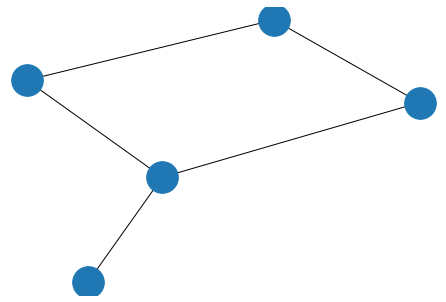

In [1]:
import networkx as nx
import numpy as np

g = nx.Graph() 

g.add_edge(1, 2) 
g.add_edge(2, 3) 
g.add_edge(3, 4) 
g.add_edge(1, 4) 
g.add_edge(1, 5)

nx.draw(g,with_labes=True,node_size=1000)
A1 = nx.to_numpy_matrix(g,nodelist=(1,2,3,4,5))

## Exercice 1

1. Identifiez sur ce dessin le sommet 1.
2. Donnez la représentation de cette arbre avec un dictionnaire
3. Créer une fonction `degre`, qui possède deux paramètres (un graphe et un sommet) et qui retourne le degré de celui-ci.

In [2]:
# taper la solution ici
# Le sommet  a trois voisins donc il s'agit du point au centre de la figure
graph = {
    1:{2,4,5},
    2:{1,3},
    3:{2,4},
    4:{1,3},
    5:{4}
}

def degre(G,s):
    if s in G:
        return len(G[s])
    else:
        return None
# autre solution

def degre_bis(G,s):
    return len(G[s]) if s in G else None

In [3]:
# Exemple d'utilisation

print(degre_bis(graph,2))

# complément avec l'instruction format
for i in range(1,6):
    print("Le sommet de {} est {}".format(i,degre(graph,i)))


2
Le sommet de 1 est 3
Le sommet de 2 est 2
Le sommet de 3 est 2
Le sommet de 4 est 2
Le sommet de 5 est 1


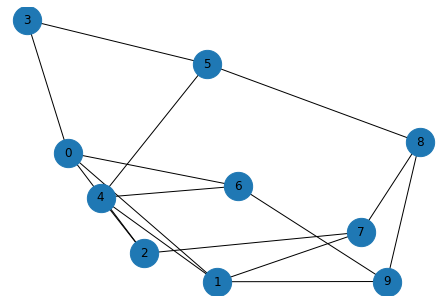

In [4]:
G = nx.Graph()

nx.add_path(G,[3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G,[3, 0, 6, 4, 2, 7, 1, 9, 8, 5])
nx.draw(G,with_labels=True,node_size=800)
A = nx.to_numpy_matrix(G,nodelist=(0,1,2,3,4,5,6,7,8,9))


## Exercice 2

Le but est de calculer le diamètre du graphe précédent. Pour ce faire on va avoir besoin du résultat suivant:

<div class="alert" style="background-color: #f4ecf7;border-left:1px solid #a569bd  ">
   On considère un graphe G dont les sommets sont numérotés  de $0$ à $n-1$ et on note  $A=(a_{ij})$ sa matrice d'adjacence.
<dl>
    <dt style="color:#8e44ad;font-weight:600">Propriété 1</dt>
    <dd>Le coefficient à la ligne $i$ et la colonne $j$ de $A^p$ représente le nombre de chemins de longueur $p$ allant du sommet $i$ au sommet $j$.</dd>   
</dl>
</div>

Remarque: *pour faciliter la programmation, on n'utilise pas les notions mathématiques qui numérotent habituellement les lignes de 1 à n et les colonnes de 1 à n*.

### Partie A

La taille de la matrice est 10, donc si on veut parcourir tous les sommets on peut utiliser l'instruction
```python
for i in range(10):
```
Pour les matrices `numpy` l'accès à l'éléments de ligne $i$ et la colonne $j$ se fait avec `A[i,j]`.
1. Afficher la matrice $A$.
2. Afficher la liste des voisins de 0.
3. Donner le degré du sommet 0.

In [5]:
# Afficher la matrice d'adjacence du graphe précédent
print(A)

#for i in range(10):
#    if A[0,i] != 0:
#        print(i)

def voisins(M,s):
    '''On suppose que la matrice est carrée'''
    v = []
    taille = np.size(A[0])
    for i in range(taille):
        if A[s,i] != 0:
            v.append(i)
    return v

for i in range(10):
    print(i,':',voisins(A,i))


[[0. 1. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]]
0 : [1, 2, 3, 6]
1 : [0, 4, 7, 9]
2 : [0, 4, 7]
3 : [0, 5]
4 : [1, 2, 5, 6]
5 : [3, 4, 8]
6 : [0, 4, 9]
7 : [1, 2, 8]
8 : [5, 7, 9]
9 : [1, 6, 8]


### Partie B

1. Écrire une fonction `degrem` qui donne le degré d'un sommet (paramètres le numéro du sommet et la matrice).
2. Donnez le nombre d'arêtes du graphe précédent
3. Écrire une fonction `chemin` d'une longueur donnée qui donne le nombre de chemin allant du sommet $i$ au sommet $j$.
    ```python
    # B=A^2 s'écrit
    B = np.dot(A,A)
    ```
4. Écrire une fonction `distance` qui donne la distance entre deux sommets.
5. Enfin, écrire une fonction `diametre` qui calcule le diamètre d'un graphe.

In [6]:
def degre(M,s):
    '''
    M: matrice d'adjacence
    s: sommet
    '''
    taille = np.size(M[0])
    d = 0
    for i in range(taille):
        if A[s,i] != 0:
            d += 1
    return d


In [7]:
def puissance_matrice(M,l):
    '''
    La puissance 0 n'est pas définie pas cette fonction
    M: matrice
    l: entier strictement positif
    '''
    B = M
    for i in range(l-1):
        B = np.dot(B,M)
    return B
    
def chemin(M,l,d,f):
    '''
    M: matrice d'adjacence
    l: longueur du chemin
    d: sommet de départ
    f: sommet de d'arrivée
    '''
    B = puissance_matrice(M,l)
    return B[d,f]

In [8]:
np.sum(A)/2
puissance_matrice(A,1)

matrix([[0., 1., 1., 1., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
        [0., 1., 1., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 0., 1., 0., 1., 0.]])

In [9]:
print(puissance_matrice(A,1)[0,8])

0.0


In [10]:
def distance(M,d,f):
    '''
    Détermine la distance d'un graphe connexe
    M: matrice d'adjacence
    d: sommet de départ
    f: sommet d'arrivée
    '''
    d_max = int(np.sum(M)/2)
    B = A
    for i in range(d_max):
        if B[d,f] != 0:
            return i+1
        else:
            B = np.dot(B,A)
    return 0

# remarque cette solution n'est pas optimale

In [11]:
distance(A,0,7)

2

In [16]:
# à fin d'éviter de devoir calculer à chaque fois la distance entre deux sommets
# et de devoir calculer les puissances de matrices on va calculer les distances entre les sommets
# à chaque calcul de A^n

def diametre(M):
    '''
    Calcule le diamètre d'un graphe connexe
    D: matrice contenant les distances entre les sommets
    '''
    D = M
    l = np.size(M[0])
    
    # on va initialiser la matrice D à 1 pour tous les voisins des sommets
    for i in range(l):
        for j in range(l):
            if M[i,j] != 0:
                D[i,j] = 1
    B = M
    d = 1
    while np.min(D) == 0:
        d += 1
        B = np.dot(B,M) 
        for i in range(l):
            for j in range(l):
                if D[i,j] == 0 and B[i,j] != 0:
                    D[i,j] = d
    return d


In [13]:
diametre(A1)

3

In [14]:
diametre(A)

3

In [19]:
help(chemin)

Help on function chemin in module __main__:

chemin(M, l, d, f)
    M: matrice d'adjacence
    l: longueur du chemin
    d: sommet de départ
    f: sommet de d'arrivée

